In [28]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()

df = pd.read_stata('BES2019_W16_v0.2.dta',columns=['lr_scale','al_scale','profile_past_vote_2017','profile_past_vote_2005','profile_eurefvote','gor','wt_new_W13_result'])

df['left_right'] = df['lr_scale'].cat.codes.replace(-1,np.nan)/2
df['authoritarian_liberal'] = df['al_scale'].cat.codes.replace(-1,np.nan)/2

#df = pd.read_stata('BES2019_W16_v0.2.dta',convert_categoricals=False)
df['labour_leave'] = pd.get_dummies(df['profile_past_vote_2017'])['Labour']*pd.get_dummies(df['profile_eurefvote'])['Leave the EU']
df['leave'] = pd.get_dummies(df['profile_eurefvote'])['Leave the EU']
df['leave_wgt'] = df['leave']*df['wt_new_W13_result']

df.head()

,lr_scale,al_scale,profile_past_vote_2017,profile_past_vote_2005,profile_eurefvote,gor,wt_new_W13_result,left_right,authoritarian_liberal,labour_leave,leave,leave_wgt
0,2.5,6,Labour,Labour,Leave the EU,East Midlands,0.409886,2.5,6.0,1,1,0.409886
1,2.5,Authoritarian,Scottish National Party (SNP),United Kingdom Independence Party (UKIP),Stay/remain in the EU,Scotland,0.547759,2.5,10.0,0,0,0.000000
2,5,6,Conservative,Conservative,Leave the EU,South East,0.844995,5.0,6.0,0,1,0.844995
3,5.5,4,Conservative,Conservative,Leave the EU,West Midlands,0.645372,5.5,4.0,0,1,0.645372
4,Left,Libertarian,Scottish National Party (SNP),Scottish National Party (SNP),Stay/remain in the EU,Scotland,0.832159,0.0,0.0,0,0,0.000000


Text(0.5, 0, 'Region')

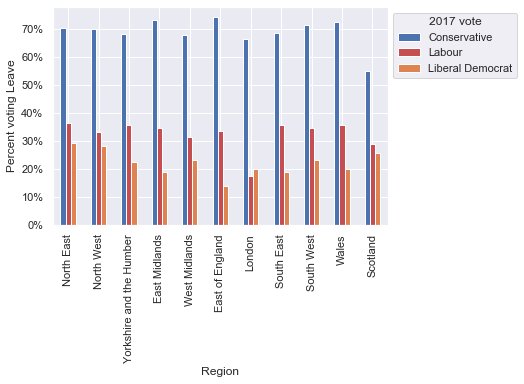

In [27]:
table = pd.pivot_table(df,index='profile_past_vote_2017',columns='gor',values='leave_wgt',aggfunc='sum')/pd.pivot_table(df,index='profile_past_vote_2017',columns='gor',values='wt_new_W13_result',aggfunc='sum')
table.dropna(inplace=True)
table.T[['Conservative','Labour','Liberal Democrat']].plot.bar(color=['C0','C3','C1'])
plt.legend(loc='upper left',bbox_to_anchor=(1,1),title='2017 vote')
plt.yticks(np.arange(0,0.8,0.1),['{}%'.format(i) for i in np.arange(0,80,10)])
plt.ylabel('Percent voting Leave')
plt.xlabel('Region')

In [33]:
pd.pivot_table(df,index='profile_past_vote_2005',columns='profile_eurefvote',values='wt_new_W13_result',aggfunc='sum')

profile_eurefvote,Stay/remain in the EU,Leave the EU,Don't know
profile_past_vote_2005,,,
I would not vote,701.148740,1110.661083,26.816510
Conservative,981.364384,2240.718394,26.850032
Labour,1505.191886,1407.558636,29.082556
Liberal Democrat,838.118161,682.271556,25.900496
Scottish National Party (SNP),83.476051,86.246457,2.608285
Plaid Cymru,24.387170,24.444342,0.000000
United Kingdom Independence Party (UKIP),15.100471,188.898060,0.703605
Green Party,107.544269,69.099409,3.720245
British National Party (BNP),3.371293,46.722757,NaN


In [34]:
pd.pivot_table(df,index='profile_past_vote_2017',columns='profile_eurefvote',values='wt_new_W13_result',aggfunc='sum')

profile_eurefvote,Stay/remain in the EU,Leave the EU,Don't know
profile_past_vote_2017,,,
Conservative,1417.019670,3866.048793,41.479386
Labour,2617.538109,1406.458527,37.261598
Liberal Democrat,617.774171,183.291232,10.907179
Scottish National Party (SNP),210.822680,80.726652,0.000000
Plaid Cymru,29.084403,30.583322,0.000000
United Kingdom Independence Party (UKIP),9.245563,193.743203,NaN
Green Party,99.618668,68.019033,0.923393
British National Party (BNP),NaN,0.000000,NaN
Other,29.658220,64.345300,8.384614


In [36]:
import statsmodels.formula.api as smf

df['labour_2017'] = pd.get_dummies(df['profile_past_vote_2017'])['Labour']
df['labour_2005'] = pd.get_dummies(df['profile_past_vote_2005'])['Labour']

res = smf.logit('labour_2017 ~ left_right + authoritarian_liberal',df).fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.556505
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            labour_2017   No. Observations:                30624
Model:                          Logit   Df Residuals:                    30621
Method:                           MLE   Df Model:                            2
Date:                Thu, 02 Jan 2020   Pseudo R-squ.:                  0.1160
Time:                        17:12:56   Log-Likelihood:                -17042.
converged:                       True   LL-Null:                       -19278.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.7787      0.045     39.708      0.000       1.691       1.867
left_right               -0.3628      0.008    -47.896      0.000      -0.378      -0.348
authoritarian_liberal    -0.2348      0.006    -39.971      0.000      -0.246      -0.223
=========================================================================================
"""